<a href="https://colab.research.google.com/github/ep1lept1c/MSU_DL/blob/main/MSU_01_NN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в глубокое обучение

## Занятие 1. Устройство нейронной сети

##### Автор: [Татьяна Гайнцева](https://www.linkedin.com/in/tgaintseva/), @atmyre

В этой лекции мы познакомимся с устройством искусственной нейронной сети и принципом ее обучения.

Обсуждать устройство нейрона и нейросети можно с двух сторон:
- Рассмотреть искусственный нейрон как модель биологического нейрона. Такая аналогия не очень строгая в том плане, что искусственный нейрон хоть и похож идейно на биологический, но моделирует он его далеко не полностью. Более того, в строении искусственной нейросети есть несколько особенностей, которые сильно отличают ее от биологической нейросети.
- Второй вариант — математический, более строгий. Здесь нейрон и вся нейросеть рассматриваются как обобщение модели логистической регрессии. И при таком подходе становится понятно, почему нейросеть устроена именно так, как она устроена.

Мы в этой лекции рассмотрим второй вариант. В дополнительных материалах к уроку вы можете найти информацию по сравнению искусственного нейрона с биологическим.

Начнем мы наше путешествие от логистической регрессии до нейронной сети с того, что вспомним устройство логистической регрессии.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Логистическая регрессия.

Логистическая регрессия — это модель для решения задачи бинарной классификации.

Рассмотрим задачу: по информации о человеке определить, разовьется ли у него в ближайшем будущем сердечно-сосудистое заболевание. Скачаем тренировочные и тестовые данные для этой задачи и посмотрим на них:

In [ ]:
! pip install wldhx.yadisk-direct
! curl -L $(yadisk-direct https://disk.yandex.com/d/nV8yH0zpMzYQ5g) -o ssz_train.csv
! curl -L $(yadisk-direct https://disk.yandex.com/d/rxee3m6enl80zA) -o ssz_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2380k  100 2380k    0     0   800k      0  0:00:02  0:00:02 --:--:-- 1609k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  492k  100  492k    0     0   214k      0  0:00:02  0:00:02 --:--:--  433k


In [ ]:
import pandas as pd

train_data = pd.read_csv('ssz_train.csv')
test_data = pd.read_csv('ssz_test.csv')

train_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,58036,18387,2,175,75.0,110,70,1,1,0,0,1,1
1,88981,23328,2,155,66.0,140,90,1,1,1,1,0,0
2,74325,17602,2,168,73.0,120,80,2,1,0,0,1,0
3,16519,23432,2,183,95.0,140,90,1,1,0,0,0,1
4,28981,23162,1,156,62.0,150,80,1,1,0,0,1,1


Логистическая регрессия ставит в соответствие каждому признаку данных коэффициент. Обозначим за $k_i$ коэффициент, соответствующий $i$-му признаку датасета. Плюс, есть еще один дополнительный коэффициент $k_0$, который не соответствует ни одному из признаков. Он называется свободным членом.

Логистическая регрессия вычисляет ответ на входящий элемент $X = (x_1, x_2, x_3, ..., x_k)$ с помощью формулы:

$$\widehat{y} = \sigma(\sum k_i x_i + k_0)$$

Здесь $\sigma$ — сигмоидная функция активации.
Она выдает ответ в виде вероятности принадлежности входящего элемента классу 1.

Обучение логрегрессии состоит в том, чтобы подобрать оптимальные значения параметров $k_i$.



Логрегрессию можно изобразить в таком виде:

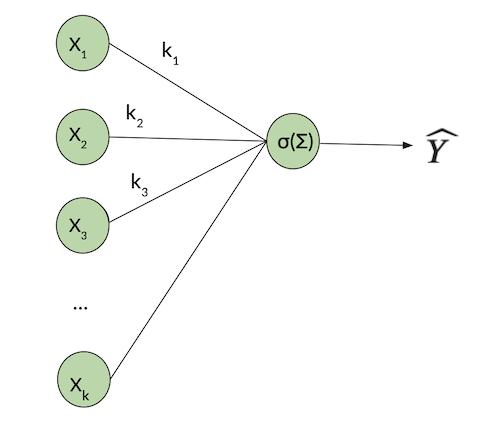

Давайте обучим логрегрессию на нашем датасете ССЗ. Разделим данные на признак и целевую переменную:

In [ ]:
y_train = train_data['cardio']
X_train = train_data.drop(columns=['cardio'])

y_test = test_data['cardio']
X_test = test_data.drop(columns=['cardio'])

Импортируем и обучим логрегрессию на тренировочных данных:

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Посмотрим на коэффициенты, которые выучила логрегрессия:

In [ ]:
lr.coef_, lr.intercept_

(array([[-7.22134115e-07,  1.13115476e-04,  2.00491355e-05,
         -4.82182477e-02,  2.07511242e-02,  3.31231290e-02,
          4.53185432e-04,  2.85322902e-03,  5.58571429e-04,
         -3.08443521e-05, -4.52657571e-05, -7.75461039e-04]]),
 array([-0.0004173]))

In [ ]:
lr.score(X_test, y_test)

0.6923333333333334

Вспомним теперь геометрический смысл логрегрессии и поймем, что **логистическая регрессия — это довольно слабый алгоритм**. В качестве решающего правила логрегрессия строит линейную гиперплоскость, которая разделяет элементы одного класса от элементов второго. В случае, когда в датасете всего два признака, линейная гиперплоскость — это прямая.

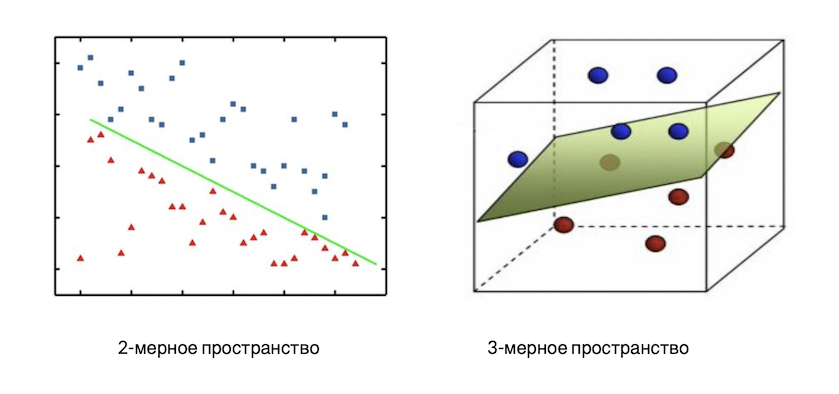



Если в нашем датасете всего два признака, то элементы датасета можно изобразить на плоскости в виде точек. Ось Х соответствует значениям первого признака, ось Y — значениям второго. Точки покрашены в два цвета в зависимости от их принадлежности к классу ноль или один.

Посмотрим теперь снова на формулу логрегрессии:

$$\widehat{y} = \sigma(\sum k_i x_i + k_0)$$

Часть формулы логрегрессии внутри сигмоиды с геометрической точки зрения отражает прямую на плоскости. И во время  обучения логрегрессия подбирает такие коэффициенты k, чтобы прямая наилучшим образом разделяла точки двух классов на плоскости.

То, что логрегрессия выражает прямую, не позволяет ей работать хорошо на тех данных, где точки линейно не разделимы. Допустим, к примеру, что точки нашего датасета были бы расположены таким образом:


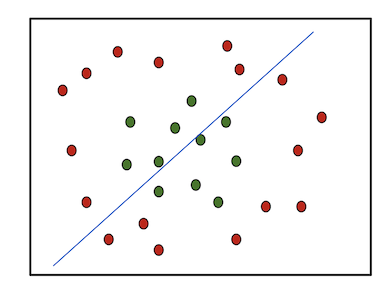

Какую прямую здесь ни построй, она не будет хорошо разделять точки разных классов. В этом случае говорят, что данные **линейно неразделимы**.

И в данном случае мы бы хотели, чтобы наша модель была более “гибкой”: чтобы она выражала функции сложнее, чем прямая.


### XOR problem


Давайте попробуем решить XOR проблему с помощью логистической регрессии.

Сгенерируем данные:

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
rng = np.random.RandomState(0)

# зададим синтетический набор точек, состоящий из 4 кластеров
X1 = rng.randn(50, 2) + np.array([4,4])
X2 = rng.randn(50, 2) + np.array([-4,4])
X3 = rng.randn(50, 2) + np.array([4,-4])
X4 = rng.randn(50, 2) + np.array([-4,-4])
X = np.concatenate([X1,X2,X3,X4])
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

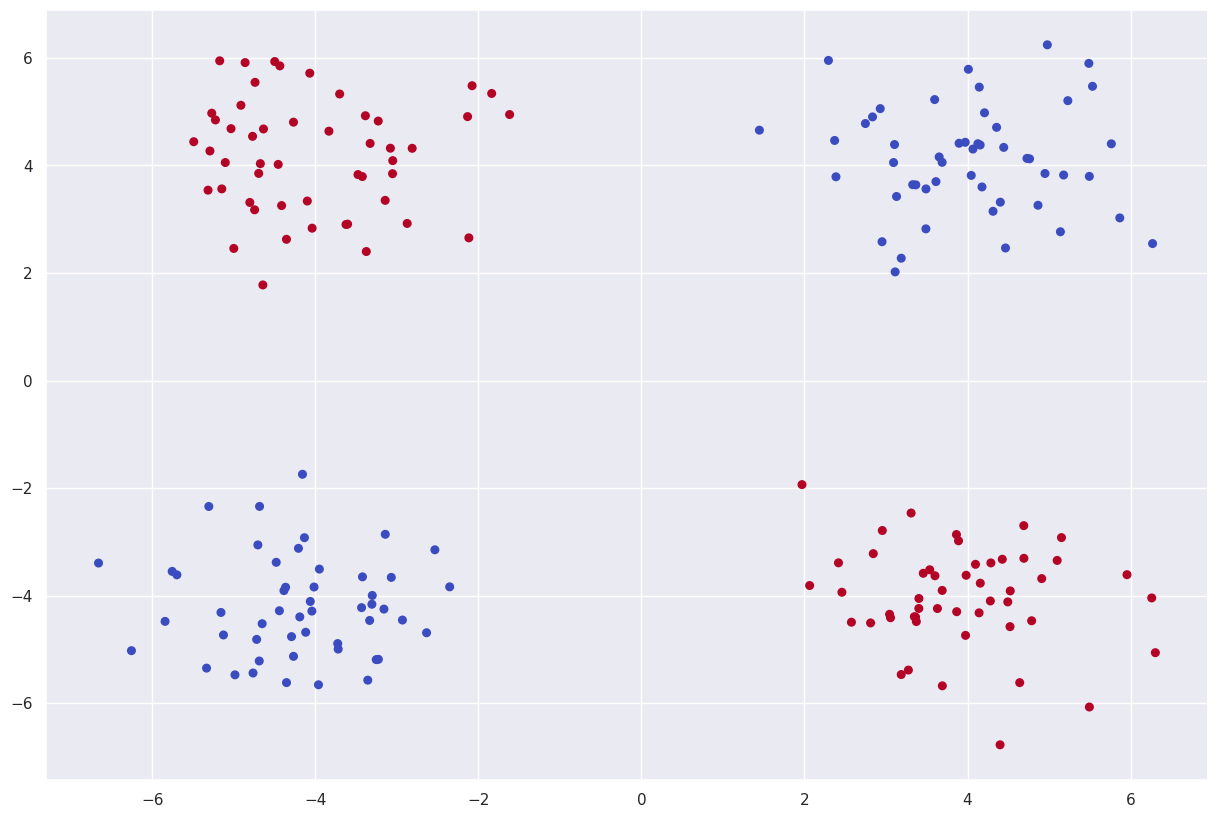

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.coolwarm);

Попробуем построить логистическую регрессию и изобразить интенсивность её выхода (то есть вероятности точки принадлежать классу "1" согласно предсказанию этой модели).

In [ ]:
def plot_boundary(clf, X, y, plot_title):
  """
  Функция для графического отображения интенсивности выхода линейной модели
  """
  x_mesh, y_mesh = np.meshgrid(np.linspace(-8, 8, 50), np.linspace(-8, 8, 50))
  clf.fit(X, y)
  Z = clf.predict_proba(np.vstack((x_mesh.ravel(), y_mesh.ravel())).T)[:, 1]
  Z = Z.reshape(x_mesh.shape)

  b1 = x_mesh.min()
  b2 = x_mesh.max()
  b3 = y_mesh.min()
  b4 = y_mesh.max()

  image = plt.imshow(Z, interpolation='nearest', extent=(b1, b2, b3, b4), aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
  contours = plt.contour(x_mesh, y_mesh, Z, levels=[0], linewidths=2, linetypes='--');
  plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.coolwarm)
  plt.xticks(())
  plt.yticks(())
  plt.axis([-8, 8, -8, 8])
  plt.colorbar(image)
  plt.title(plot_title, fontsize=20);

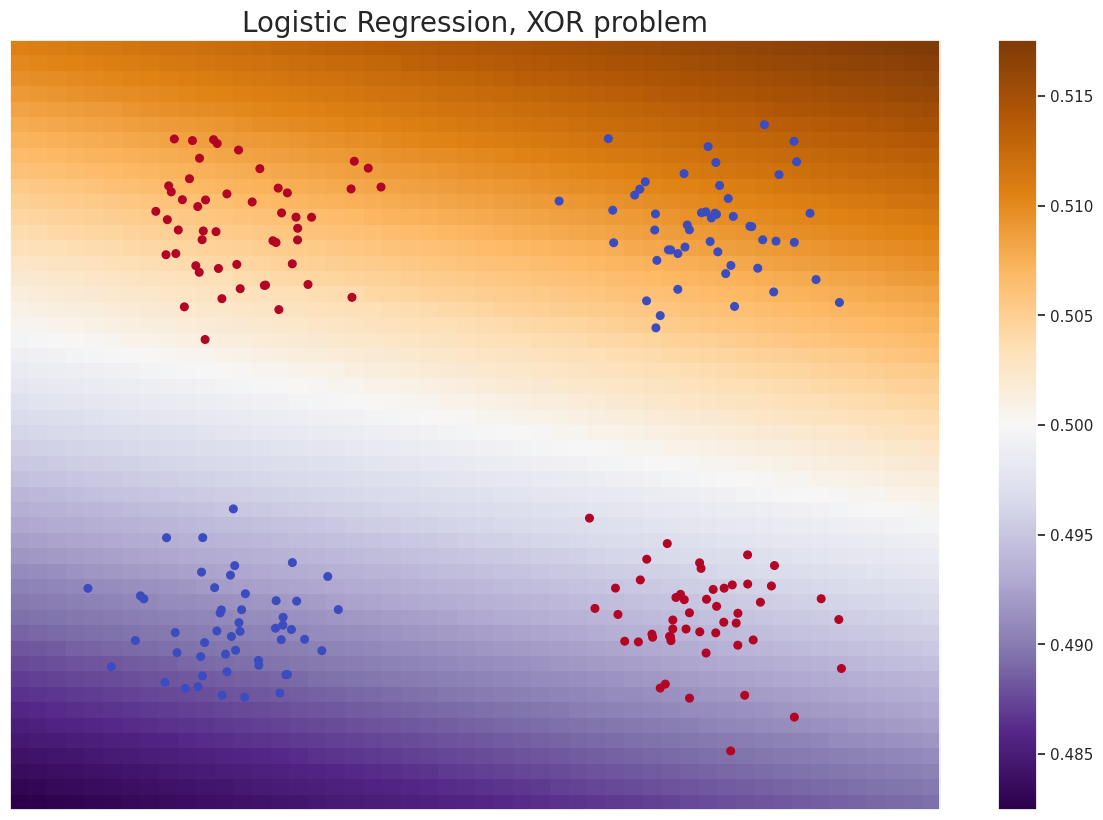

In [ ]:
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(15,10))
plot_boundary(LogisticRegression(), X, y,
"Logistic Regression, XOR problem")

## Генерация промежуточных признаков.

Давайте подумаем, как можно было бы подойти к решению этой проблемы: как можно было бы сделать алгоритм логрегрессии более гибким, умеющим подстраиваться под более сложные зависимости в данных.

Сейчас наш пайплайн получения ответа на входящий элемент выглядит так:
Мы подаем признаки элемента датасета на вход нашей модели и получаем ответ с помощью формулы.


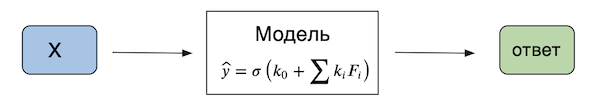

А давайте сделаем вот что: перед подачей признаков на вход модели попытаемся модифицировать признаки так, чтобы они стали линейно разделимы. Прогоним их через какую-нибудь функцию, чтобы значения признаков элементов датасета так поменялись, что точки на плоскости стали бы разделимы с помощью прямой, то есть, с помощью логрегрессии.


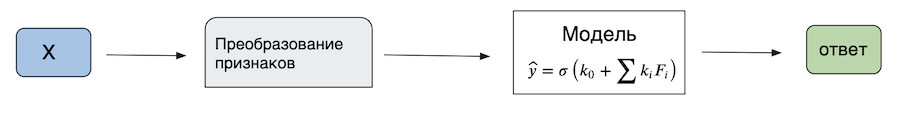

Оказывается, для некоторых типов признаков можно подобрать такие функции, что после их применения преобразованные признаки действительно становятся хорошо разделимы. Такие функции называются **ядрами**, а использование ядер для преобразования признаков — [kernel trick](https://en.wikipedia.org/wiki/Kernel_method). Чаще всего ядра переводят признаки в пространство большей размерности, то есть, увеличивают количество признаков в датасете. Например, из двух признаков получается три.




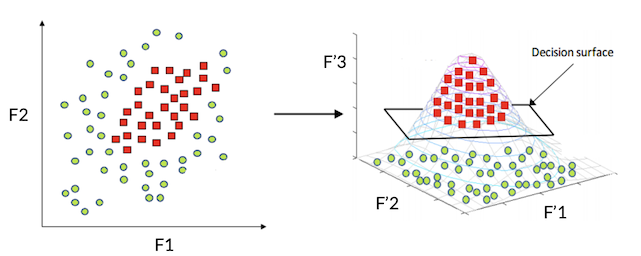

Из-за такой манипуляции те элементы, которые были изначально не разделимы на плоскости, когда признаков было два, теперь становятся линейно разделимыми в пространстве, когда признаков стало три.

Однако **ядра — это фиксированные функции**. Они хорошо работают в некоторых случаях и плохо — в других. Но подобрать какое-нибудь фиксированное “универсальное” ядро, чтобы оно всегда делало элементы датасета линейно разделимыми, не получится. Поэтому хочется придумать какой-то более гибкий и универсальный способ преобразовывать признаки, чтобы он вне зависимости от датасета мог делать элементы линейно разделимыми.

Идея возникает такая: что если преобразование признаков тоже сделать обучаемым? Сделать что-то вроде еще нескольких моделей машинного обучения, цель которых будет брать на вход признаки элемента и выдавать по ним новые признаки для этого элемента. Такие, по которым логрегрессия уже сможет хорошо разделить выборку. То есть, это будут такие обучаемые ядра.


Давайте так и сделаем. И в качестве таких моделей давайте также возьмем логистические регрессии.


Перейдем в [эту презентацию](https://docs.google.com/presentation/d/19lqLWLqSEH5eozMwdChFDIgXoJV25OMUoNUzR3-sTQM/edit?usp=sharing) для обсуждения того, что тогда получится.

## Полносвязная нейросеть

Итак, у нас получилась такая конструкция:

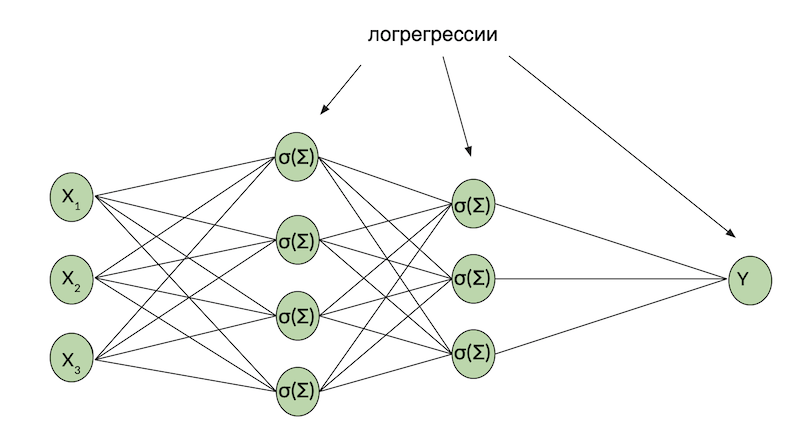

Вот таким образом мы из идеи улучшения модели логрегрессии получили **полносвязную нейросеть** с произвольным количеством скрытых слоев.








Формула в матричном виде:

$$\widehat{y} = \sigma(W_3^T \sigma(W_2^T \sigma(W_1^TX + b_1 ) + b_{2}) + b_{3})$$

В общем случае, когда в сети k слоев:

$$\widehat{y} = \sigma(W_k^T \sigma(W_{k-1}^T \sigma(\dots(W_1^T X + b_1) … ) + b_{k-1}) + b_{k})$$

Процесс обучения такой нейросети под задачу состоит в том, чтобы найти оптимальные значения всех параметров всех логрегрессий. Все логрегрессии при этом обучаются совместно. Их веса подстраиваются друг под друга, чтобы вся итоговая модель хорошо решала поставленную задачу.

Стоит еще сказать, что часто вся часть сети до последнего слоя называется feature extractor, а последний слой — классификатором. Это согласуется с тем, как мы строили полносвязную сеть из логистической регрессии: последний слой сети — это, собственно, сама логрегрессия, а все другие слои — преобразователи признаков для подачи их на вход последнему слою-логрегрессии.

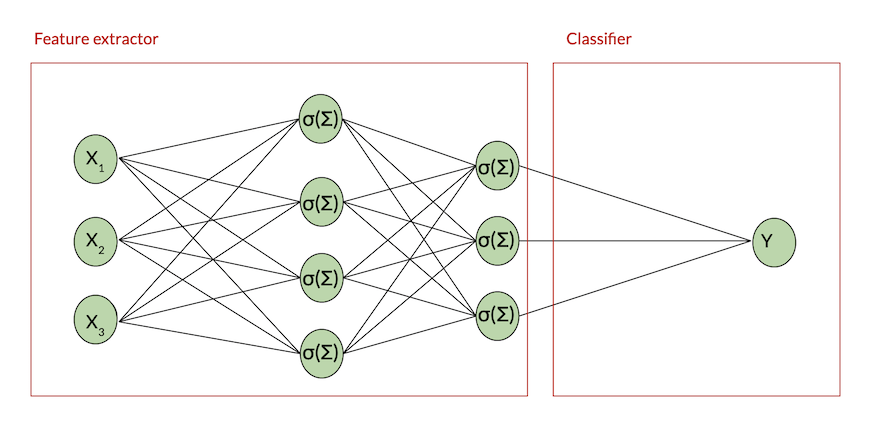

Прежде чем мы узнаем, как именно обучаются веса нейросети, давайте обратим внимание на две следующие вещи:

### Функции активации промежуточных слоев сети

Итак, мы поняли, что нейросеть состоит из слоев нейронов, соединенных между собой весами. Каждый нейрон выражает функцию

$$\sigma \left( \sum_{i=0}^{k} x_ik_i + k_0 \right)$$

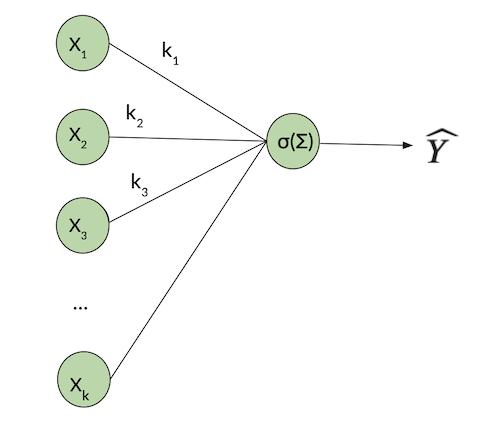

Функция $\sigma$ нейрона называется функцией активации нейрона. У нас в нейросети получилось, что $\sigma$ — это сигмоидная функция, как у логистической регрессии. Но у нейронов полносвязной нейросети могут быть разные функции активации, не только сигмоида. В этом разделе мы рассмотрим некоторые популярные функции активации, использующиеся на практике.

Но перед этим несколько замечаний относительно функций активации:

1. Во всех нейронах одного слоя сети используется одинаковая функция активации. Это связано с тем, что выход нейросети по входу вычисляется в матричном виде:
$$\widehat{y} = \sigma(W_k^T \sigma(W_{k-1}^T \sigma(... ) + b_{k-1}) + b_{k})$$

    И применять функцию активации удобно сразу к вектору выхода каждого слоя, а не к каждому нейрону в отделности.

2. Функция активация нужна после каждого слоя сети. Не надо делать слой сети без функции активации.

    Это связано с тем, что формула слоя сети внутри функции активации — то линейная функция. И два подряд слоя сети без функции активации между ними — это композиция двух линейных функций, что тоже есть линейная функция. Т.е. два подряд слоя сети без функции активации между ними эквивалентны одному слою сети. Чтобы два подряд слоя сети выражали более сложную функцию, чем линейная, между ними должна быть функция активации.

    Из-за этого функцию активации также называют нелинейностью: она добавляет нелинейную компоненту в формулу сети.

3. Если мы решаем задачу бинарной классификации, в последнем слое нейросети обязательно должна быть сигмоидная функция активации (т.к., по сути, последний слой — это логрегрессия, которая и решает задачу бинарной классификаци). А в скрытых слоях сети уже могут быть другие функции активации.

Теперь давайте рассмотрим несколько популярных функций активации, которые используются в скрытых слоях полносвязной нейросети.

#### Sigmoid

В нашей получившейся модели нейросети в качестве функции активации промежуточных слоев использовалась сигмоидная функция:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$




Ее график и график ее производной:

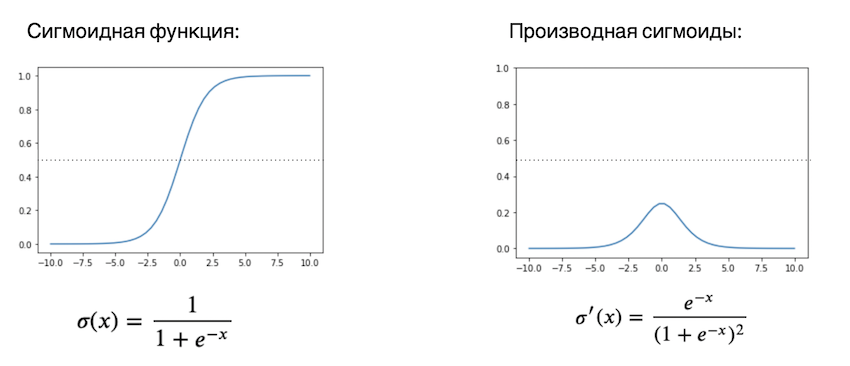

Так получилось, потому что мы строили нашу нейросеть из логистических регрессий. Однако для скрытых слоев нейросети такой выбор функции активации не самый удачный. Это связано со свойствами производной сигмоиды. Как мы увидим далее, при обучении нейросетей производные играют ключевую роль. Подробнее о том, в чем недостаток сигмоиды как функции активации, [можно почитать тут](https://www.reg.ru/blog/stehnfordskij-kurs-lekciya-6-obuchenie-nejrosetej-chast-1-2/).

Что же используется вместо сигмоиды? Есть много видов функций активации, которые используются в разных нейросетях. Самые популярные из них следующие:

#### Tanh

Тангенциальная функция активации пришла на смену сигмоиде и долго использовалась как универсальная функция активации для скрытых слоев сетей. Но у нее тоже есть сильные недостатки, и многие из них такой же природы, как и у сигмоиды.

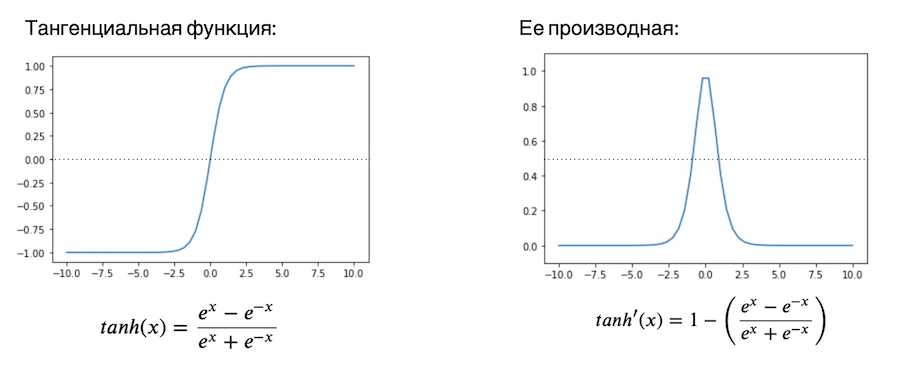

#### ReLU

ReLU — это функция активации, которую можно назвать "универсальной" на сегодняшний день. Она хорошо работает в большинстве случаев. У нее нет тех недостатков, что есть у sigmoid и tanh, а также она и ее производная намного легче в вычислении.

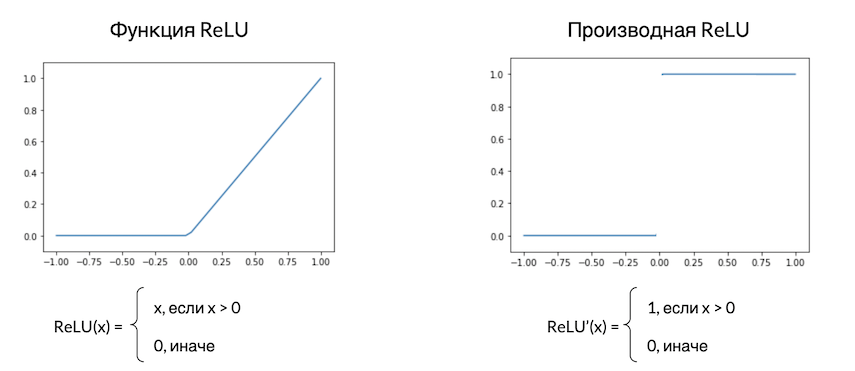

**По умолчанию функция, которую стоит использовать в скрытых слоях нейросетей — именно ReLU.**

#### Другие функции активации

Кроме sigmoid, tanh, ReLU есть и другие функции активации. Например, Leaky ReLu, ELU (модификации ReLU), Swish, и другие. Многие из них хороши для решения определенных задач. Про некоторые из них можно [прочитать тут](https://aipavlov.com/articles/funkcii-ativacii-neyronnyh-setey/).

### Решение XOR-problem с помощью полносвязной нейросети.

Давайте теперь попробуем решить XOR-проблему с помощью полносвязной нейросети. Построим сеть с одним скрытым слоем и тремя нейронами с функцией активации ReLU

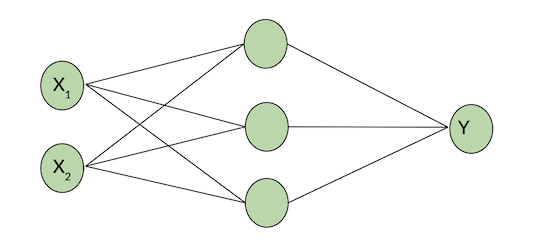

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(3,), activation='relu', solver='sgd', max_iter=5000, random_state=42)
mlp.fit(X, y)

MLPClassifier(hidden_layer_sizes=(3,), max_iter=5000, random_state=42,
              solver='sgd')

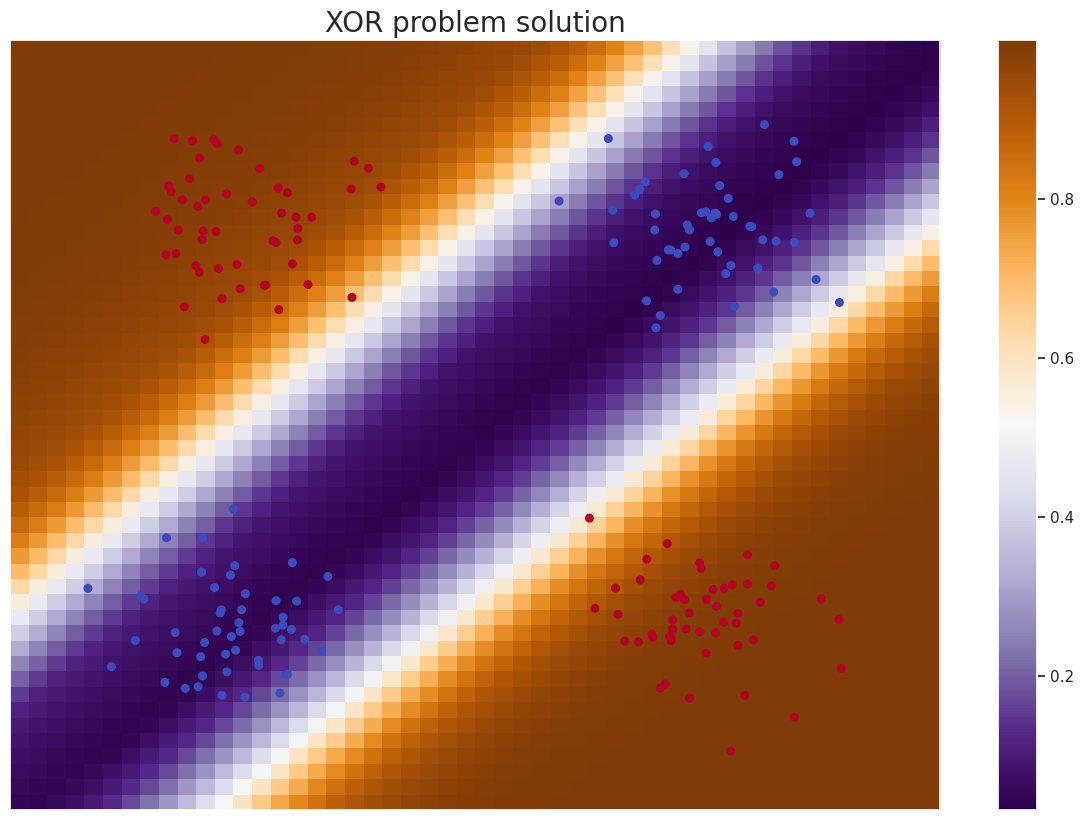

In [ ]:
plt.figure(figsize=(15,10))
plot_boundary(mlp, X, y,
"XOR problem solution")

In [ ]:
mlp.coefs_, mlp.intercepts_

([array([[-0.57970827,  0.27712403,  0.95174703],
         [ 0.59766358, -0.26263994, -0.94687295]]),
  array([[ 0.9035537 ],
         [-1.6579653 ],
         [ 1.52113653]])],
 [array([-0.96251181,  1.8538095 , -0.3380246 ]), array([-0.04092799])])

### Нейросеть для задачи регрессии

До сих пор мы вели разговор о задаче бинарной лкассификации. И нейросеть мы построили из логрегрессии — модели для задачи бинарной классификации. Но, разумеется, с помощью нейросети можно решать не только эту задачу, но и другие.

Из хорошо известных нам задач из классического машинного обучения есть:
- задача регрессии
- задача многоклассовой классификации.

Для того, чтобы адаптировать полносвязную нейросеть для задачи регрессии, нужно просто логистическую регрессию в последнем слое заменить на линейную. То есть, убрать у нейрона последнего слоя функцию активации. Обратите внимание, что во всех скрытых слоях сети функции активации нцжно оставить!


Про задачу многоклассовой классификации мы поговори на следующем занятии.



### Обучение нейросети

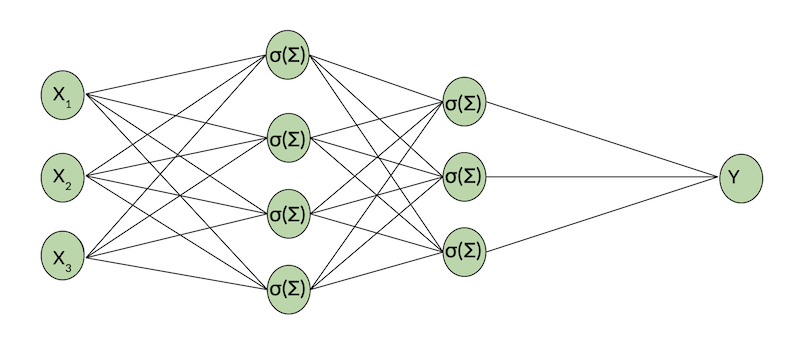

$$\widehat{y} = \sigma(W_3 \sigma(W_3^T \sigma(W_1^TX + b_1 ) + b_{2}) + b_{3})$$

Обучение нейросети состоит в том, чтобы найти оптимальные значения параметров сети для конкретной задачи.

Что это значит: пусть у нас есть датасет. Возьмем датасет ССЗ, с которым мы работали выше.

In [ ]:
train_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,58036,18387,2,175,75.0,110,70,1,1,0,0,1,1
1,88981,23328,2,155,66.0,140,90,1,1,1,1,0,0
2,74325,17602,2,168,73.0,120,80,2,1,0,0,1,0
3,16519,23432,2,183,95.0,140,90,1,1,0,0,0,1
4,28981,23162,1,156,62.0,150,80,1,1,0,0,1,1


И пусть мы выбрали лосс-функцию $L$, которую мы хотим минимизировать на наших данных.

Тогда задача обучения сети — найти такие параметры сети $W_1, b_1, W_2, b_2, \dots$, что среднее значение лосс-функции на элементах тренировочного датасета минимально: $$\frac{\sum_{i=1}^n L(y_i, \widehat{y}_i)}{n} \to min$$

, где $n$ — количество элементов в данных, $y_i$ — верное значение целевой переменной для $i$-ого элемента данных,  $\widehat{y}_i$ — ответ модели для $i$-ого элемента данных.

Обучение весов нейросети происходит с помощью алгоритма [градиентного спуска](https://ru.wikipedia.org/wiki/Градиентный_спуск). Мы не будем подробно останавливаться на устройстве этого алгоритма в этом занятии, подробно о нем можно узнать из дополнительных материалов в конце ноутбука.

## Разные типы нейронных сетей

В этом занятии мы познакомились с устройством полносвязной нейронной сети. Это классическое устройство нейрости, с которого и началась история глубокого обучения. Но за последние годы были придуманы и другие архитектуры нейросетей, хорошо подходящие для решения разного рода задач. С некоторыми из них мы познакомимся на занятиях в этом курсе. Стоит, однако, заметить, что все другие архитектуры нейросетей основаны на тех же самых идеях, что и полносвязные нейросети.

Некоторые виды нейросетей:

1) **Полносвязные нейронные сети**. Это те самые модели, о которых мы говорили на сегодняшней лекции;

2) **Свёрточные нейронные сети**. Эта архитектура была придумана для более эффективной работы с изображениями;

3) **Рекуррентные нейронные сети**. Эта архитектура была придумана для более эффективной работы с данными, представленными в виде последовательностей;

4) **Attention-based Трансформеры**. Изначально придуманная для задачи машинного перевода, идея этой архитектуры показала себя очень эффективной в совершенно разных задачах, от обработки изображений до текста и звука;

5) **Графовые нейросети**. Этот вид нейросетей хорошо показывает себя в работе с данными, которые имеют природу графа. Например, графы социальных сетей/молекулы веществ и т.п.

# Дополнительные материалы

## Полезные ссылки



- "[Создаем нейронную сеть](https://www.litres.ru/book/tarik-rashid/sozdaem-neyronnuu-set-54815634/)" (Рашид Т.) — книга, в которой в первых главах отлично объяснено устройство полносвязной нейросети и принцип ее обучения.
- Цикл лекций "Введение в Нейронные сети" в Deep Learning School:
    - [История развития Deep Learning](https://youtu.be/ZfXpX8tMg-w?feature=shared);
    - [Устройство нейросети. Механизм обратного распространения ошибки](https://youtu.be/-yiq1DRX9K0?feature=shared).
    - [Полносвязная нейросеть](https://www.youtube.com/watch?v=O0nGKKFyYT4&list=PL0Ks75aof3Tiru-UvOvYmXzD1tU0NrR8V&index=29)
    - [Функции активации](https://youtu.be/3F7rydcAa0w?feature=shared)
- [Курс "ИИ Старт"](https://stepik.org/course/125587/syllabus) на Stepik (бесплатный). В его первых модулях — основы Python, математики для ML и машинного обучения.
- Colab-ноутбуки с [ликбезом по производной](https://colab.research.google.com/drive/1Etz36ELaIoqOoDR_gbLVn3HsMfxtbK2Q?usp=sharing) и [ликбезом по градиентной оптимизации](https://colab.research.google.com/drive/1I73AiHtN0XvXCgCMj1oLKZTNw4CRDdTL?usp=sharing)


## Организационная информация

По организационным вопросам:
- На этой неделе вся организационная информация будет опубликована в телеграм-канале курса;
- По вопросам, на которые вы не нашли ответ, можно писать на почту msu.courses.questions@yandex.ru. Пожалуйста, имейте в виду, что мы получаем очень много писем. Отвечаем по мере возможности;
- Скоро также запустится поддержка в чат-боте, об этом сообщим дополнительно.

## Аналогия между искусственным и биологическим нейроном и нейросетью

Здесь мы постараемся показать, как можно провести аналогию между искусственным и биологическим нейроном и нейросетью.

Для начала в общих чертах опишем, как устроены биологическая нейросеть и отдельные нейроны в нашем мозге. Здесь уточню: мое описание биологических процессов не претендует на полноту и строгость: я опишу их на очень абстрактном, идейном уровне.

Итак, наш мозг состоит из миллиадров нейронов, соединенных между собой в сеть. Связи между нейронами называются синапсы: по ним передается информация. Нейроны соединены между собой довольно хаотично, никакой особой структуры в связях нет. Более того, между нейронами могут появляться новые связи и исчезать старые.

Каждый нейрон получает информацию от одной группы нейронов и передает ее другой группе нейронов. Информация в мозге представлена в виде электрических импульсов, поэтому когда нейрон получает и передает информацию, по нему проходит электрический ток и он как бы "загорается".

Также у синапсов между нейронами разное сопротивление. Величина сопротивления соединения определяет, какая величина тока пройдет от одного нейрона к другому. Если сопротивление высокое, лишь малая часть импульса, выпущенного первым нейроном, дойдет до второго. Если сопротивление низкое, то практически весь импульс беспрепятственно пройдет по соединению. Таким образом, величину сопротивления можно считать важностью сигнала: насколько для второго нейрона важен сигнал от первого.


Вот так в общих чертах устроен процесс передачи информации между нейронами в мозге.


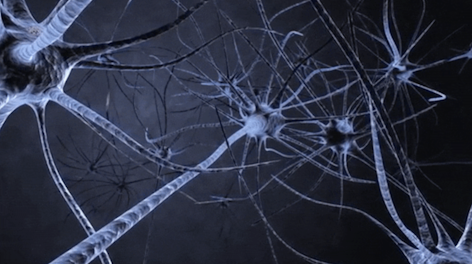

Гифку с прохождением электрического тока по нейронам [можно найти тут](https://media3.giphy.com/media/9N2UvCx7wXLnG/giphy.gif). Видно, что отдельные пласты нейронов последовательно загораются и гаснут: так информация течет по нейронной сети мозга от одной части к другой.


Теперь чуть подробнее обсудим устройство отдельного биологического нейрона. В общих чертах **у нейрона три составляющие: дендриты, аксон и мембрана**.

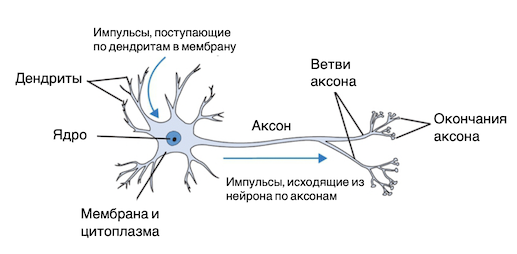

**Дендриты** — это входы нейрона, по ним нейрон получает информацию от других нейронов мозга.

В **мембране и цитоплазме** обрабатывается полученная по дендритам информация: все испульсы от других нейронов складываются, и сумма сравнивается с некоторым пороговым значением. Если сумма больше порога, происходит активация нейрона и информация передается дальше другим нейронам. Если сумма меньше порога, то полученная информация считается незначительной, нейрон не активируется и не передает информацию дальше по сети. То есть, импульс гаснет.

И последний элемент нейрона — **аксон**. Аксон соединяется с дендритами других нейронов синапсами. Именно по нему происходит передача информации, аккумулированной в нейроне, следующим нейронам. Ну, если произошла активация, конечно.

Вот так примерно устроен биологический нейрон. Теперь давайте на основе его устройства построим модель искусственного нейрона.


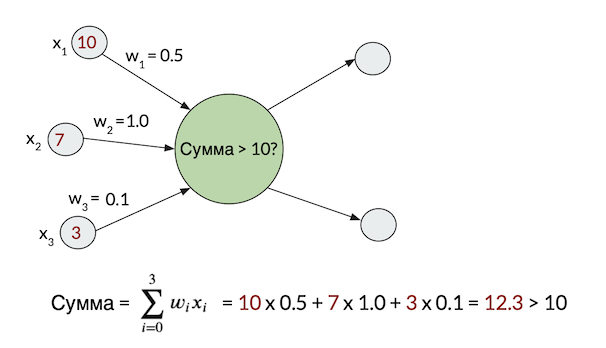

Окружность — это мембрана, ребра слева — синапсы, по которым в ядро поступает информация от других нейронов, которые обозначены серыми окружностями. Ребра справа — синапсы, по которым информация идет другим нейронам дальше по сети.
В компьютере вся информация представлена в виде чисел. Поэтому и наш искусственный нейрон информацию будет получать и передавать в виде чисел, а не электрических испульсов, как это происходит в биологической нейросети.


Как искусственный нейрон обрабатывает информацию: смотрите, наш нейрон соединен с пятью другими нейронами: он получает информацию от трех и передает дальше информацию двум. Пусть три входящих нейрона посылают на вход нашему зеленому нейрону импульсы размера десять, семь и три. Каждое ребро между нейронами имеет вес: некое действительное число. При прохождении сигнала от нейрона по ребру сигнал умножается на вес ребра. То есть, в наш зеленый нейрон придут три сигнала: десять умножить на ноль пять, семь умножить на один и три умножить на ноль один. Веса ребер в искусственном нейроне — это аналоги сопротивления на связах между нейронами в биологической нейросети. Далее внутри ядра эти сигналы складываются, получается один: в нашем случае это двенадцать целых три десятых. И затем этот сигнал сравнивается с пороговым значением. Пусть пороговое значение в нашем нейроне будет десять.



Мы видим, что подобная модель искусственного нейрона напоминает логистическую регрессию и искусственный нейрон, о котором мы говорили на занятии. Единственное отличие — функция активации. В искусственной неросети она не пороговая.

Вот так можно провести аналогию между биологическим и искусственным нейроном и нейросетью. Эта аналогия, однако, не объясняет, почему в искусственной нейросети нейроны объединены в слои, и связи есть только между нейронами последовательных слоев. Но в основной части ноутбука, к счастью, мы уже разобрались, почему искусственная сеть устроена именно так.